In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 250)

### Read in ZRI, IRS and ACS data

In [3]:
zri = pd.read_csv('./zri_clean.csv')

In [4]:
zri.head(1)

,index,Month,Metro,ZRI,ZRI_1yr_ago
0,2019-10025,12,New York-Newark-Jersey City,8.251925,8.113307


In [5]:
zri.shape

(169680, 5)

In [6]:
irs = pd.read_csv('./data/full_irs.csv')
irs['zipcode'] = irs['zipcode'].astype(str).apply(lambda x: x.zfill(5))
irs['index_merge'] = (irs['year']+2).astype(str) + '-' + irs['zipcode']

In [7]:
irs.head(1)

,zipcode,n1,mars1,mars2,mars4,prep,n2,numdep,a00100,n02650,a02650,n00200,a00200,n00300,a00300,n00600,a00600,n00650,a00650,n00700,a00700,n00900,a00900,n01000,a01000,n01700,a01700,schf,n02300,a02300,n02500,a02500,n26270,a26270,n02900,a02900,n03220,a03220,n03300,a03300,n03270,a03270,n03150,a03150,n03210,a03210,n04470,a04470,a00101,n18425,a18425,n18450,a18450,n18500,a18500,n18300,a18300,n19300,a19300,n19700,a19700,n04800,a04800,n05800,a05800,n09600,a09600,n07100,a07100,n07300,a07300,n07180,a07180,n07230,a07230,n07240,a07240,n07220,a07220,n07260,a07260,n09400,a09400,n10600,a10600,n59660,a59660,n59720,a59720,n11070,a11070,n10960,a10960,n06500,a06500,n10300,a10300,n85300,a85300,n11901,a11901,n11902,a11902,high_income,low_income,state,avg_income,year,index,index_merge
0,01432,-0.976213,0.529412,0.348039,0.107843,0.465686,1.776961,0.497549,-0.770415,1.0,-0.769467,0.872549,0.813722,0.345588,0.00482,0.193627,0.007046,0.17402,0.004996,0.223039,0.001825,0.125,0.023992,0.156863,0.008317,0.171569,0.059457,0.0,0.080882,0.009255,0.112745,0.021963,0.029412,0.014047,0.267157,0.011986,0.036765,0.000144,0.0,0.0,0.022059,0.002422,0.019608,0.001115,0.112745,0.001957,0.370098,0.12085,0.621935,0.343137,0.02961,0.022059,0.000221,0.343137,0.021951,0.370098,0.053494,0.308824,0.041889,0.279412,0.008313,0.838235,0.690558,0.833333,0.118236,0.022059,0.001059,0.306373,0.005782,0.044118,0.000052,0.056373,0.000489,0.071078,0.001331,0.041667,0.00012,0.147059,0.003152,0.031863,0.00012,0.102941,0.004319,0.965686,0.140976,0.117647,0.003705,0.098039,0.003232,0.066176,0.001223,0.063725,0.000994,0.786765,0.112369,0.818627,0.118035,0.009804,0.000217,0.181373,0.009291,0.791667,0.031419,0.181373,0.311275,MA,-0.329901,2013,2013-01432,2015-01432


In [8]:
irs.shape

(17174, 110)

In [3]:
acs = pd.read_csv('../Data/ACS_all_zipcodes.csv')
acs = acs.iloc[:,1:]

In [4]:
acs.head(1)

,geo_id,total_pop,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,housing_units,owner_occupied_housing_units_median_value,housing_units_renter_occupied,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,median_year_structure_built,owner_occupied_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,worked_at_home,no_car,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,not_in_labor_force,armed_forces,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_undergrad_college,year,male_under_18,male_18_to_24,male_25_to_49,male_50_to_66,male_above_67,male_x,female_under_18,female_18_to_24,female_25_to_49,female_50_to_66,female_above_67,occupation_x,in_grades_x,vacant_housing_units_x,poverty_total
0,51341,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,32500.0,7.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,14.0,0.0,5.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,6.0,0.0,7.0,152.0,0.0,1.0,16.0,0.0,0.0,2.0,6.0,16.0,1.0,1.0,0.0,2.0,13.0,0.0,1.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,2018,0.0,0.0,0.0,11.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,29.0


In [5]:
acs.shape

(132049, 83)

In [6]:
def normalization_acs(df):
    
    #Create the column lists of different type of feature
    #Add total count of features if not exist 
    housing_units_cols = [col for col in df.columns if 'housing_units' in col] + ['mobile_homes']
    
    dwellings_cols = [col for col in df.columns if 'dwellings' in col]
    df['dwelling_total'] = df[dwellings_cols].sum(axis=1)
    
    
    by_year_cols = ['aggregate_travel_time_to_work','median_year_structure_built',
                    'housing_units','owner_occupied_housing_units_median_value']
    
    pass_cols = ['dwelling_total','housing_total','total_pop']
    
    pop = ['white_pop','not_us_citizen_pop','black_pop','asian_pop','hispanic_pop','amerindian_pop','other_race_pop',
        'two_or_more_races_pop','poverty_total','different_house_year_ago_different_city',
         'different_house_year_ago_same_city','commute_less_10_mins','commute_10_14_mins',
         'commute_15_19_mins','commute_20_24_mins','commute_25_29_mins','commute_30_34_mins','commute_35_44_mins',
         'commute_60_more_mins','commute_45_59_mins','worked_at_home','no_car','one_car',
         'two_cars','three_cars','four_more_cars','aggregate_travel_time_to_work','associates_degree','bachelors_degree',
        'high_school_diploma','less_one_year_college','masters_degree','one_year_more_college','less_than_high_school_graduate',
         'high_school_including_ged','bachelors_degree_2','bachelors_degree_or_higher_25_64','graduate_professional_degree',
         'some_college_and_associates_degree','not_in_labor_force','armed_forces','occupation_management_arts',
         'occupation_natural_resources_construction_maintenance','occupation_production_transportation_material',
         'occupation_sales_office','occupation_services','in_grades_1_to_4','in_grades_5_to_8','in_grades_9_to_12',
         'in_undergrad_college','male_under_18','male_18_to_24','male_25_to_49','male_50_to_66','male_above_67','male_x',
         'female_under_18','female_18_to_24','female_25_to_49','female_50_to_66','female_above_67','occupation_x',
         'in_grades_x', 'poverty_tot']
    
    #Normalize each group of features 
    for col in housing_units_cols:
        if col in by_year_cols:
            pass
        else:
            df[col] = df[col]/df['housing_units']
            
    for col in dwellings_cols:
        df[col] = df[col]/df['dwelling_total']
        
    
    for col in pop:
         df[col] = df[col]/df['total_pop']
    
    
    #group data by year and standardize columns across zipcode
    for year in df['year'].unique():
        df_year = df.loc[df['year'] == year,]
        
        for col in by_year_cols:
            df.loc[df['year'] == year,col] = (df_year[col] - df_year[col].mean())/df_year[col].std()
            
    
    #remove columns not used
    df = df[df.columns[~df.columns.isin(pass_cols)]]
        
        
    return df

In [7]:
acs_n = normalization_acs(acs)

In [8]:
acs_n['index'] = (acs_n['year']+2).astype(str) + '-' + acs_n['geo_id'].astype(str)

<ipython-input-8-6feb981f60e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_n['index'] = (acs_n['year']+2).astype(str) + '-' + acs_n['geo_id'].astype(str)


In [9]:
acs_n = acs_n[acs_n .columns[~acs_n .columns.isin(['geo_id'])]]

In [10]:
acs_n.head(1)

,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,housing_units,owner_occupied_housing_units_median_value,housing_units_renter_occupied,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,median_year_structure_built,owner_occupied_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,worked_at_home,no_car,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,not_in_labor_force,armed_forces,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_undergrad_college,year,male_under_18,male_18_to_24,male_25_to_49,male_50_to_66,male_above_67,male_x,female_under_18,female_18_to_24,female_25_to_49,female_50_to_66,female_above_67,occupation_x,in_grades_x,vacant_housing_units_x,poverty_total,index
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.842482,-0.926908,0.28,0.0,0.0,0.96,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148328,0.56,0.0,0.2,0.24,0.08,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.28,0.24,0.0,0.28,-1.603192,0.0,0.04,0.64,0.0,0.0,0.08,0.24,0.64,0.04,0.04,0.0,0.08,0.52,0.0,0.04,0.08,0.0,0.2,0.16,0.0,0.0,0.0,0.0,2018,0.0,0.0,0.0,0.44,0.16,0.16,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.16,1.16,2020-51341


### Create combined data set

#### IRS portion

In [14]:
zri_irs = pd.merge(zri,irs,left_on='index',right_on='index_merge',how='inner')

In [15]:
zri_irs1 = zri_irs[['index_x','year','state','Metro','Month','ZRI','ZRI_1yr_ago','n1','mars1','mars2','mars4','prep',
                   'n2','numdep','a00100','n02650','a02650','n00200','a00200','n00300','a00300','n00600',
                   'a00600','n00650','a00650','n00700','a00700','n00900','a00900','n01000','a01000',
                   'n01700','a01700','schf','n02300','a02300','n02500','a02500','n26270','a26270','n02900','a02900',
                   'n03220','a03220','n03300','a03300','n03270','a03270','n03150','a03150','n03210','a03210',
                   'n04470','a04470','a00101','n18425','a18425','n18450','a18450','n18500','a18500','n18300',
                   'a18300','n19300','a19300','n19700','a19700','n04800','a04800','n05800','a05800','n09600',
                   'a09600','n07100','a07100','n07300','a07300','n07180','a07180','n07230','a07230','n07240',
                   'a07240','n07220','a07220','n07260','a07260','n09400','a09400','n10600','a10600','n59660',
                   'a59660','n59720','a59720','n11070','a11070','n10960','a10960','n06500','a06500','n10300',
                   'a10300','n85300','a85300','n11901','a11901','n11902','a11902','high_income', 'low_income', 
                   'avg_income']]

In [16]:
zri_irs1.shape

(169416, 112)

In [35]:
zri_irs['zipcode'].nunique()

2826

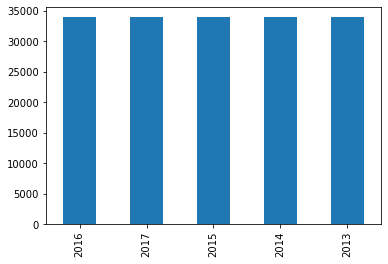

In [36]:
zri_irs1['year'].value_counts().plot(kind='bar')

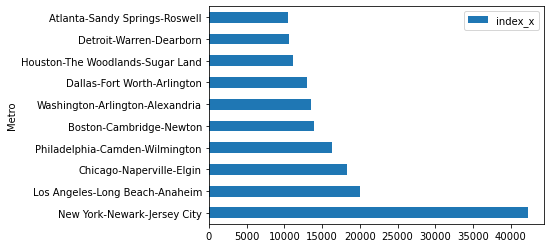

In [19]:
zri_irs.groupby('Metro')[['index_x']].count().reset_index().sort_values('index_x',ascending=False)\
                                    .plot(x='Metro',y='index_x',kind='barh')

(7.0, 8.0)

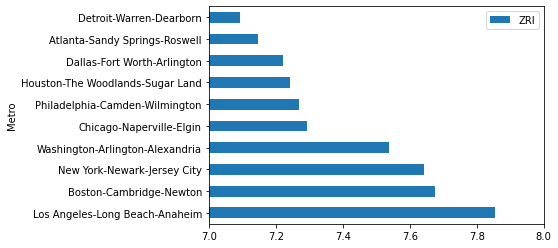

In [20]:
zri_irs.groupby('Metro')[['ZRI']].mean().reset_index().sort_values('ZRI',ascending=False)\
                                    .plot(x='Metro',y='ZRI',kind='barh')
plt.xlim(7,8)

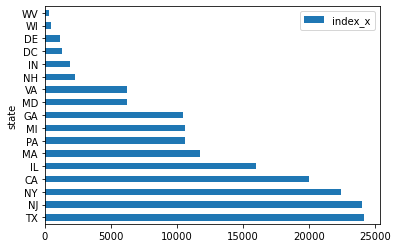

In [21]:
zri_irs.groupby('state')[['index_x']].count().reset_index().sort_values('index_x',ascending=False)\
                                    .plot(x='state',y='index_x',kind='barh')

(6.7, 8.0)

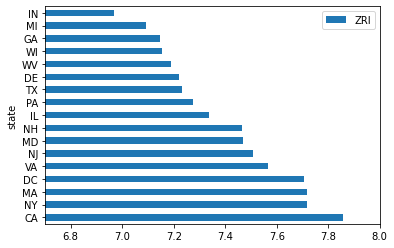

In [22]:
zri_irs.groupby('state')[['ZRI']].mean().reset_index().sort_values('ZRI',ascending=False)\
                                    .plot(x='state',y='ZRI',kind='barh')
plt.xlim(6.7,8)

In [23]:
zri_irs.groupby('Month')[['index_x']].count().reset_index()

,Month,index_x
0,1,14118
1,2,14118
2,3,14118
3,4,14118
4,5,14118
5,6,14118
6,7,14118
7,8,14118
8,9,14118
9,10,14118


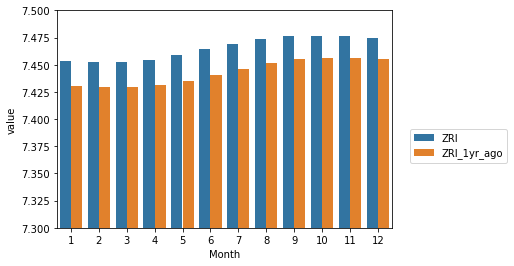

In [24]:
import seaborn as sns

months = pd.melt(zri_irs.groupby('Month')[['ZRI','ZRI_1yr_ago']].mean().reset_index(), 'Month',['ZRI','ZRI_1yr_ago'])
sns.barplot(x="Month", y="value", hue='variable',data=months)
plt.ylim(7.3, 7.5)
plt.legend(bbox_to_anchor=(1.2, 0.3), loc=8, borderaxespad=0.)

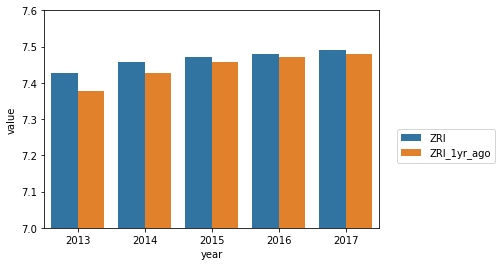

In [25]:
import seaborn as sns

years = pd.melt(zri_irs.groupby('year')[['ZRI','ZRI_1yr_ago']].mean().reset_index(), 'year',['ZRI','ZRI_1yr_ago'])
sns.barplot(x="year", y="value", hue='variable',data=years)
plt.ylim(7, 7.6)
plt.legend(bbox_to_anchor=(1.2, 0.3), loc=8, borderaxespad=0.)

#### Feature selection by Lasso model

1. Filter out IRS features that have low correlation with ZRI

In [37]:
zri_irs1.head()

,index_x,year,state,Metro,Month,ZRI,ZRI_1yr_ago,n1,mars1,mars2,mars4,prep,n2,numdep,a00100,n02650,a02650,n00200,a00200,n00300,a00300,n00600,a00600,n00650,a00650,n00700,a00700,n00900,a00900,n01000,a01000,n01700,a01700,schf,n02300,a02300,n02500,a02500,n26270,a26270,n02900,a02900,n03220,a03220,n03300,a03300,n03270,a03270,n03150,a03150,n03210,a03210,n04470,a04470,a00101,n18425,a18425,n18450,a18450,n18500,a18500,n18300,a18300,n19300,a19300,n19700,a19700,n04800,a04800,n05800,a05800,n09600,a09600,n07100,a07100,n07300,a07300,n07180,a07180,n07230,a07230,n07240,a07240,n07220,a07220,n07260,a07260,n09400,a09400,n10600,a10600,n59660,a59660,n59720,a59720,n11070,a11070,n10960,a10960,n06500,a06500,n10300,a10300,n85300,a85300,n11901,a11901,n11902,a11902,high_income,low_income,avg_income
0,2019-10025,2017,NY,New York-Newark-Jersey City,12,8.251925,8.113307,3.60825,0.615737,0.252616,0.103749,0.63252,1.565606,0.35789,5.623152,1.0,5.661359,0.801003,0.61187,0.43592,0.009913,0.390584,0.035186,0.372493,0.026338,0.207062,0.005965,0.246731,0.043384,0.364647,0.105234,0.173932,0.037307,0.000654,0.027245,0.000994,0.152572,0.019469,0.105493,0.097888,0.325414,0.019896,0.027027,0.000042,0.042066,0.008813,0.061029,0.003574,0.022886,0.000743,0.067132,0.000469,0.486704,0.155506,0.866075,0.448561,0.094381,0.031822,0.000222,0.23714,0.015913,0.484525,0.110967,0.208152,0.01522,0.402354,0.020554,0.848518,0.775628,0.836748,0.205786,0.156495,0.010163,0.306888,0.004927,0.187228,0.003733,0.039669,0.000147,0.044464,0.000325,0.02354,0.000027,0.048605,0.000305,0.00218,0.000024,0.209895,0.008333,0.936138,0.226024,0.103313,0.001099,0.078466,0.000889,0.042502,0.000298,0.028553,0.000158,0.804054,0.200859,0.855493,0.21645,0.132738,0.003941,0.281168,0.016874,0.614429,0.014019,0.341325,0.265475,0.744895
1,2019-10025,2017,NY,New York-Newark-Jersey City,11,8.261785,8.079308,3.60825,0.615737,0.252616,0.103749,0.63252,1.565606,0.35789,5.623152,1.0,5.661359,0.801003,0.61187,0.43592,0.009913,0.390584,0.035186,0.372493,0.026338,0.207062,0.005965,0.246731,0.043384,0.364647,0.105234,0.173932,0.037307,0.000654,0.027245,0.000994,0.152572,0.019469,0.105493,0.097888,0.325414,0.019896,0.027027,0.000042,0.042066,0.008813,0.061029,0.003574,0.022886,0.000743,0.067132,0.000469,0.486704,0.155506,0.866075,0.448561,0.094381,0.031822,0.000222,0.23714,0.015913,0.484525,0.110967,0.208152,0.01522,0.402354,0.020554,0.848518,0.775628,0.836748,0.205786,0.156495,0.010163,0.306888,0.004927,0.187228,0.003733,0.039669,0.000147,0.044464,0.000325,0.02354,0.000027,0.048605,0.000305,0.00218,0.000024,0.209895,0.008333,0.936138,0.226024,0.103313,0.001099,0.078466,0.000889,0.042502,0.000298,0.028553,0.000158,0.804054,0.200859,0.855493,0.21645,0.132738,0.003941,0.281168,0.016874,0.614429,0.014019,0.341325,0.265475,0.744895
2,2019-10025,2017,NY,New York-Newark-Jersey City,10,8.254009,8.101678,3.60825,0.615737,0.252616,0.103749,0.63252,1.565606,0.35789,5.623152,1.0,5.661359,0.801003,0.61187,0.43592,0.009913,0.390584,0.035186,0.372493,0.026338,0.207062,0.005965,0.246731,0.043384,0.364647,0.105234,0.173932,0.037307,0.000654,0.027245,0.000994,0.152572,0.019469,0.105493,0.097888,0.325414,0.019896,0.027027,0.000042,0.042066,0.008813,0.061029,0.003574,0.022886,0.000743,0.067132,0.000469,0.486704,0.155506,0.866075,0.448561,0.094381,0.031822,0.000222,0.23714,0.015913,0.484525,0.110967,0.208152,0.01522,0.402354,0.020554,0.848518,0.775628,0.836748,0.205786,0.156495,0.010163,0.306888,0.004927,0.187228,0.003733,0.039669,0.000147,0.044464,0.000325,0.02354,0.000027,0.048605,0.000305,0.00218,0.000024,0.209895,0.008333,0.936138,0.226024,0.103313,0.001099,0.078466,0.000889,0.042502,0.000298,0.028553,0.000158,0.804054,0.200859,0.855493,0.21645,0.132738,0.003941,0.281168,0.016874,0.614429,0.014019,0.341325,0.265475,0.744895
3,2019-10025,2017,NY,New York-Newark-Jersey City,9,8.237215,8.134849,3.60825,0.615737,0.252616,0.103749,0.63252,1.565606,0.35789,5.623152,1.0,5.661359,0.801003,0.61187,0.43592,0.009913,0.390584,0.035186,0.372493,0.02633

In [38]:
low_rho_irs = zri_irs1.columns[5:][np.abs(zri_irs1.iloc[:,5:].corr()['ZRI'])<0.2]

In [40]:
zri_irs_clean1 = zri_irs1[zri_irs1.columns[~zri_irs1.columns.isin(low_rho_irs)]]

In [41]:
zri_irs_clean1.shape

(169416, 96)

2.  Run Lasso Model with the selected features + ZRI from one year ago

In [42]:
lasso_irs_test_X = zri_irs_clean1.loc[zri_irs_clean1['year']== 2017,].iloc[:,6:]
lasso_irs_train_X = zri_irs_clean1.loc[zri_irs_clean1['year']!= 2017,].iloc[:,6:]

In [43]:
lasso_irs_test_y = zri_irs_clean1.loc[zri_irs_clean1['year']== 2017,]['ZRI']
lasso_irs_train_y = zri_irs_clean1.loc[zri_irs_clean1['year']!= 2017,]['ZRI']

In [44]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=3000, tol=0.01)

intercepts = []
R2  = []
coefs_dict = {}
MSE = []

alphaRange = np.logspace(-8,-4,20)
for alpha in alphaRange:
    lasso_cv.set_params(alphas=[alpha])  
    lasso_cv.fit(lasso_irs_train_X, lasso_irs_train_y)
    intercepts.append(lasso_cv.intercept_)
    coefs_dict[alpha] = lasso_cv.coef_
    R2.append(lasso_cv.score(lasso_irs_train_X, lasso_irs_train_y)) 
    MSE.append(lasso_cv.mse_path_.mean())

In [45]:
for i in range(20):
    alpha = alphaRange[i]
    coef_alpha = coefs_dict[alpha]
    print(i, round(alpha,5), len(coef_alpha[coef_alpha!=0]),round(R2[i],5), round(MSE[i],6))

0 0.0 89 0.98499 0.001623
1 0.0 88 0.98497 0.001633
2 0.0 88 0.98481 0.001671
3 0.0 88 0.98452 0.001686
4 0.0 88 0.98449 0.001685
5 0.0 86 0.98463 0.001669
6 0.0 84 0.98482 0.001643
7 0.0 78 0.98491 0.001647
8 0.0 77 0.98486 0.001649
9 0.0 75 0.98477 0.001658
10 0.0 68 0.98465 0.001672
11 0.0 64 0.98466 0.00166
12 0.0 59 0.98461 0.001666
13 1e-05 53 0.98446 0.001684
14 1e-05 48 0.98414 0.001738
15 1e-05 43 0.98376 0.001776
16 2e-05 33 0.98355 0.001823
17 4e-05 25 0.98331 0.001855
18 6e-05 17 0.98264 0.001906
19 0.0001 10 0.9823 0.00193


The R^2 and MSE don't change drastically as lambda level changes. In this case, we decide to select the model with the largest lambda, since we believe the multicollinearity in the data set is relatively severe. 

In [46]:
coef_alpha19 = pd.DataFrame({'feature':lasso_irs_train_X.columns, 'coef':coefs_dict[alphaRange[19]]})
coef_alpha19['weight'] = abs(coef_alpha19['coef'])
coef_alpha19['sign'] = coef_alpha19['coef'].mask(coef_alpha19['coef']>0,'P').mask(coef_alpha19['coef'] < 0,'N')
coef_alpha19[['feature','weight','sign']].loc[coef_alpha19.coef != 0].sort_values(by='weight',ascending=False)

,feature,weight,sign
0,ZRI_1yr_ago,0.971455,P
3,prep,0.062159,P
10,n00300,0.013371,P
12,n00600,0.010341,N
40,n18425,0.005922,N
14,n00650,0.001942,N
87,high_income,0.001819,N
6,a00100,0.001455,P
89,avg_income,0.000235,N
7,a02650,0.000008,P


In [47]:
picked_feature = coef_alpha19.loc[coef_alpha19.coef != 0,'feature'].tolist()

In [61]:
zri_irs_final = pd.concat([zri_irs_clean1[['year']],zri_irs_clean1[picked_feature]],axis=1)
zri_irs_final = zri_irs_final.rename(columns={'prep':'paid_prep','a00100':'adj_gross_income',
                              'a02650': 'tot_income_amt','n00300':'taxable_intrest_amt',
                             'n00600':'num_return_w_ordinary_dividends','n00650':'num_return_w_qualify_dividends',
                             'n18425':'num_retur_w_state_local_tax'})
zri_irs_final.head(1)

,year,ZRI_1yr_ago,paid_prep,adj_gross_income,tot_income_amt,taxable_intrest_amt,num_return_w_ordinary_dividends,num_return_w_qualify_dividends,num_retur_w_state_local_tax,high_income,avg_income
0,2017,8.113307,0.63252,5.623152,5.661359,0.43592,0.390584,0.372493,0.448561,0.341325,0.744895


#### ACS portion

In [94]:
zri_acs = pd.merge(zri,acs_n,on='index',how='inner')

In [95]:
zri_acs.head(1)

,index,Month,Metro,ZRI,ZRI_1yr_ago,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,housing_units,owner_occupied_housing_units_median_value,housing_units_renter_occupied,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,median_year_structure_built,owner_occupied_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,worked_at_home,no_car,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,not_in_labor_force,armed_forces,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_undergrad_college,year,male_under_18,male_18_to_24,male_25_to_49,male_50_to_66,male_above_67,male_x,female_under_18,female_18_to_24,female_25_to_49,female_50_to_66,female_above_67,occupation_x,in_grades_x,vacant_housing_units_x,poverty_total
0,2019-10025,12,New York-Newark-Jersey City,8.251925,8.113307,0.540569,0.129876,0.090324,0.097815,0.240713,0.000519,0.006548,0.023267,4.958571,2.609643,0.629458,0.029199,0.001929,0.011336,0.00575,0.003655,0.019427,0.042817,0.095018,0.226528,0.59547,0.00078,-1.882828,0.243567,0.043546,0.08739,0.018404,0.0178,0.030249,0.061897,0.032803,0.117787,0.068922,0.049618,0.057172,0.042582,0.32912,0.107499,0.010044,0.001452,0.0,0.289158,0.027569,0.22713,0.063561,0.019707,0.176167,0.052192,0.074347,0.07547,0.22713,0.4126,0.290712,0.099468,0.316109,0.000191,0.355237,0.012195,0.014632,0.075618,0.05589,0.029656,0.03614,0.024168,0.063201,2017,0.062554,0.034138,0.175616,0.073859,0.068647,0.034021,0.08063,0.055551,0.201808,0.077536,0.096586,0.039234,0.147253,0.095847,1.107605


In [96]:
acs['index'] = (acs['year']+2).astype(str) + '-' + acs['geo_id'].astype(str)
zri_acs_analysis = pd.merge(zri,acs,on='index',how='inner')

In [97]:
zri_acs_analysis.head(1)

,index,Month,Metro,ZRI,ZRI_1yr_ago,geo_id,total_pop,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,housing_units,owner_occupied_housing_units_median_value,housing_units_renter_occupied,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,median_year_structure_built,owner_occupied_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,worked_at_home,no_car,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,not_in_labor_force,armed_forces,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_undergrad_college,year,male_under_18,male_18_to_24,male_25_to_49,male_50_to_66,male_above_67,male_x,female_under_18,female_18_to_24,female_25_to_49,female_50_to_66,female_above_67,occupation_x,in_grades_x,vacant_housing_units_x,poverty_total,dwelling_total
0,2019-10025,12,New York-Newark-Jersey City,8.251925,8.113307,10025,94382.0,0.540569,0.129876,0.090324,0.097815,0.240713,0.000519,0.006548,0.023267,4.958571,2.609643,0.629458,0.029199,0.001929,0.011336,0.00575,0.003655,0.019427,0.042817,0.095018,0.226528,0.59547,0.00078,-1.882828,0.243567,0.043546,0.08739,0.018404,0.0178,0.030249,0.061897,0.032803,0.117787,0.068922,0.049618,0.057172,0.042582,0.32912,0.107499,0.010044,0.001452,0.0,0.289158,0.027569,0.22713,0.063561,0.019707,0.176167,0.052192,0.074347,0.07547,0.22713,0.4126,0.290712,0.099468,0.316109,0.000191,0.355237,0.012195,0.014632,0.075618,0.05589,0.029656,0.03614,0.024168,0.063201,2017,0.062554,0.034138,0.175616,0.073859,0.068647,0.034021,0.08063,0.055551,0.201808,0.077536,0.096586,0.039234,0.147253,0.095847,1.107605,48696.0


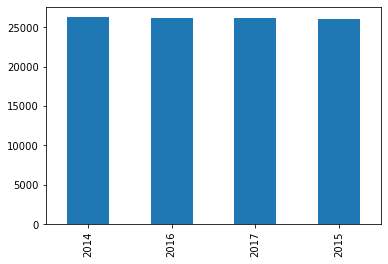

In [98]:
zri_acs_analysis['year'].value_counts().plot(kind='bar')

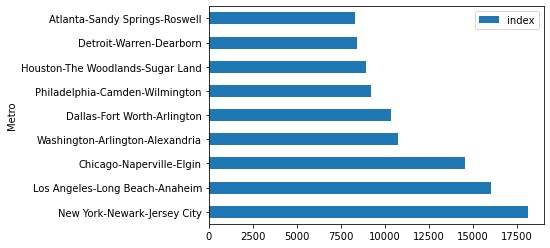

In [99]:
zri_acs_analysis.groupby('Metro')[['index']].count().reset_index().sort_values('index',ascending=False)\
                                    .plot(x='Metro',y='index',kind='barh')

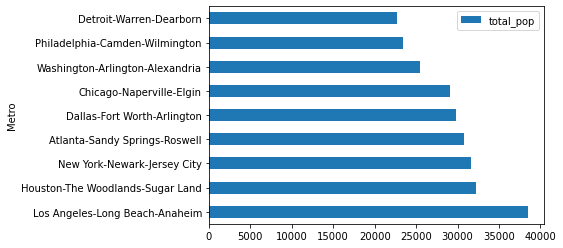

In [60]:
zri_acs_analysis.groupby('Metro')[['total_pop']].mean().reset_index().sort_values('total_pop',ascending=False)\
                                    .plot(x='Metro',y='total_pop',kind='barh')

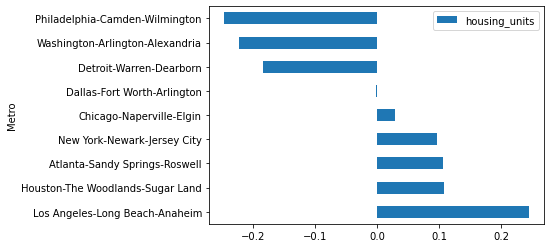

In [63]:
zri_acs_analysis.groupby('Metro')[['housing_units']].mean().reset_index().sort_values('housing_units',ascending=False)\
                                    .plot(x='Metro',y='housing_units',kind='barh')

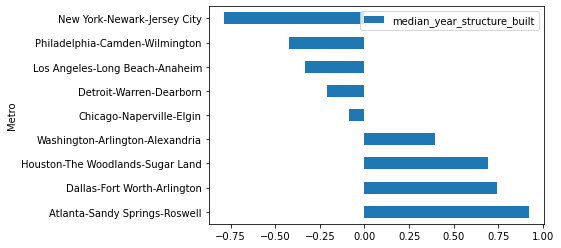

In [64]:
zri_acs_analysis.groupby('Metro')[['median_year_structure_built']].mean().reset_index().sort_values('median_year_structure_built',ascending=False)\
                                    .plot(x='Metro',y='median_year_structure_built',kind='barh')

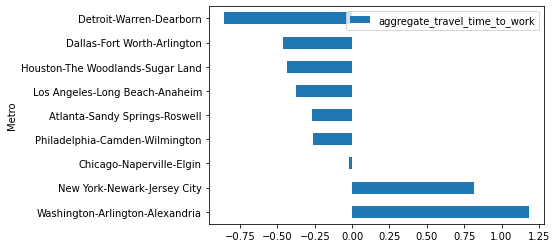

In [65]:
zri_acs_analysis.groupby('Metro')[['aggregate_travel_time_to_work']].mean().reset_index().sort_values('aggregate_travel_time_to_work',ascending=False)\
                                    .plot(x='Metro',y='aggregate_travel_time_to_work',kind='barh')

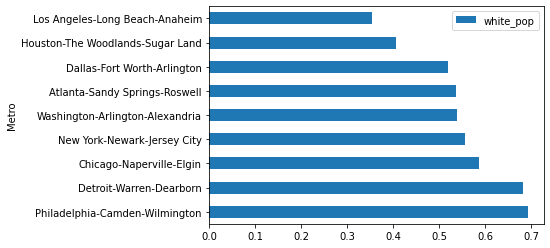

In [66]:
zri_acs_analysis.groupby('Metro')[['white_pop']].mean().reset_index().sort_values('white_pop',ascending=False)\
                                    .plot(x='Metro',y='white_pop',kind='barh')

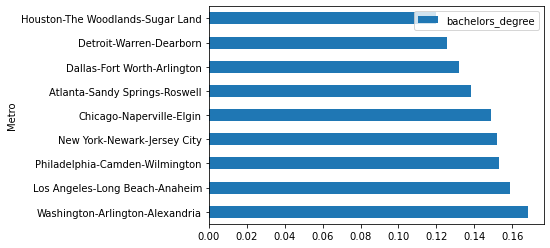

In [109]:
zri_acs_analysis.groupby('Metro')[['bachelors_degree']].mean().reset_index().sort_values('bachelors_degree',ascending=False)\
                                    .plot(x='Metro',y='bachelors_degree',kind='barh')

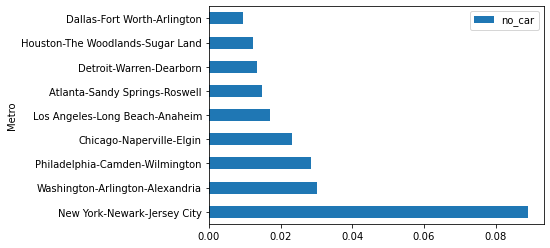

In [68]:
zri_acs_analysis.groupby('Metro')[['no_car']].mean().reset_index().sort_values('no_car',ascending=False)\
                                    .plot(x='Metro',y='no_car',kind='barh')

Run Lasso Model with the all features + ZRI from one year ago

In [123]:
zri_acs_test_X = zri_acs.loc[zri_acs['year']==2017].iloc[:,4:].drop(['year'],axis=1)
zri_acs_train_X = zri_acs.loc[zri_acs['year']!=2017].iloc[:,4:].drop(['year'],axis=1)

In [105]:
zri_acs_test_y = zri_acs.loc[zri_acs['year']==2017]['ZRI']
zri_acs_train_y = zri_acs.loc[zri_acs['year']!=2017]['ZRI']

In [106]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=3000, tol=0.01)

intercepts = []
R2  = []
coefs_dict = {}
MSE = []


alphaRange = np.logspace(-8,-4,20)
for alpha in alphaRange:
    lasso_cv.set_params(alphas=[alpha])  
    lasso_cv.fit(zri_acs_train_X, zri_acs_train_y)
    intercepts.append(lasso_cv.intercept_)
    coefs_dict[alpha] = lasso_cv.coef_
    R2.append(lasso_cv.score(zri_acs_train_X, zri_acs_train_y)) 
    MSE.append(lasso_cv.mse_path_.mean())

In [107]:
for i in range(20):
    alpha = alphaRange[i]
    coef_alpha = coefs_dict[alpha]
    print(i, round(alpha,5), len(coef_alpha[coef_alpha!=0]),round(R2[i],5), round(MSE[i],6))

0 0.0 81 0.98842 0.001438
1 0.0 81 0.98842 0.001438
2 0.0 81 0.98842 0.001438
3 0.0 81 0.98842 0.001438
4 0.0 81 0.98842 0.001438
5 0.0 81 0.98842 0.00144
6 0.0 81 0.98842 0.001441
7 0.0 81 0.98842 0.001441
8 0.0 78 0.98836 0.001446
9 0.0 78 0.98835 0.001448
10 0.0 77 0.98835 0.001448
11 0.0 75 0.98833 0.001449
12 0.0 68 0.98834 0.001448
13 1e-05 53 0.98832 0.001447
14 1e-05 47 0.98826 0.001454
15 1e-05 43 0.98815 0.001468
16 2e-05 34 0.98794 0.001494
17 4e-05 26 0.98768 0.001515
18 6e-05 18 0.98757 0.001523
19 0.0001 12 0.98751 0.001521


In [108]:
coef_alpha19 = pd.DataFrame({'feature':zri_acs_train_X.columns, 'coef':coefs_dict[alphaRange[19]]})
coef_alpha19['weight'] = abs(coef_alpha19['coef'])
coef_alpha19['sign'] = coef_alpha19['coef'].mask(coef_alpha19['coef']>0,'P').mask(coef_alpha19['coef']<0,'N')
coef_alpha19[['feature','weight','sign']].loc[coef_alpha19.coef != 0].sort_values(by='weight',ascending=False)

,feature,weight,sign
0,ZRI_1yr_ago,0.970565,P
37,no_car,0.032546,N
52,bachelors_degree_or_higher_25_64,0.014404,N
1,white_pop,0.010115,N
44,bachelors_degree,0.008432,N
10,owner_occupied_housing_units_median_value,0.006547,P
57,occupation_management_arts,0.001161,N
23,median_year_structure_built,0.001059,N
16,dwellings_2_units,0.000860,P
42,aggregate_travel_time_to_work,0.000798,P


In [110]:
picked_feature2 = coef_alpha19.loc[coef_alpha19.coef != 0,'feature'].tolist()

In [156]:
picked_feature2

['ZRI_1yr_ago',
 'white_pop',
 'housing_units',
 'owner_occupied_housing_units_median_value',
 'housing_units_renter_occupied',
 'dwellings_2_units',
 'median_year_structure_built',
 'no_car',
 'aggregate_travel_time_to_work',
 'bachelors_degree',
 'bachelors_degree_or_higher_25_64',
 'occupation_management_arts']

In [128]:
selected = list(set(picked_feature + picked_feature2))

In [133]:
combined = pd.merge(zri_irs1,acs_n,left_on='index_x',right_on='index',how='inner').drop(['year_y','index'],axis=1)

In [140]:
combined_selected = combined[['index_x','year_x','state','Metro','Month','ZRI']+selected]

In [144]:
combined_selected = combined_selected.rename(columns={'prep':'paid_prep','a00100':'adj_gross_income',
                              'a02650': 'tot_income_amt','n00300':'taxable_intrest_amt',
                             'n00600':'num_return_w_ordinary_dividends','n00650':'num_return_w_qualify_dividends',
                             'n18425':'num_retur_w_state_local_tax'})

In [145]:
combined_selected.head()

,index_x,year_x,state,Metro,Month,ZRI,occupation_management_arts,num_return_w_ordinary_dividends,no_car,ZRI_1yr_ago,high_income,avg_income,num_return_w_qualify_dividends,bachelors_degree,num_retur_w_state_local_tax,paid_prep,taxable_intrest_amt,median_year_structure_built,white_pop,bachelors_degree_or_higher_25_64,housing_units,tot_income_amt,housing_units_renter_occupied,adj_gross_income,aggregate_travel_time_to_work,owner_occupied_housing_units_median_value,dwellings_2_units
0,2019-10025,2017,NY,New York-Newark-Jersey City,12,8.251925,0.355237,0.390584,0.32912,8.113307,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655
1,2019-10025,2017,NY,New York-Newark-Jersey City,11,8.261785,0.355237,0.390584,0.32912,8.079308,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655
2,2019-10025,2017,NY,New York-Newark-Jersey City,10,8.254009,0.355237,0.390584,0.32912,8.101678,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655
3,2019-10025,2017,NY,New York-Newark-Jersey City,9,8.237215,0.355237,0.390584,0.32912,8.134849,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655
4,2019-10025,2017,NY,New York-Newark-Jersey City,8,8.233769,0.355237,0.390584,0.32912,8.166983,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655


In [146]:
test_X = combined_selected.loc[combined_selected['year_x']==2017].iloc[:,6:]
train_X = combined_selected.loc[combined_selected['year_x']!=2017].iloc[:,6:]

In [147]:
test_y = combined_selected.loc[combined_selected['year_x']==2017]['ZRI']
train_y = combined_selected.loc[combined_selected['year_x']!=2017]['ZRI']

In [152]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=3000, tol=0.01)

intercepts = []
R2  = []
coefs_dict = {}
MSE = []


alphaRange = np.logspace(-5,-3,20)
for alpha in alphaRange:
    lasso_cv.set_params(alphas=[alpha])  
    lasso_cv.fit(train_X, train_y)
    intercepts.append(lasso_cv.intercept_)
    coefs_dict[alpha] = lasso_cv.coef_
    R2.append(lasso_cv.score(train_X, train_y)) 
    MSE.append(lasso_cv.mse_path_.mean())

In [153]:
for i in range(20):
    alpha = alphaRange[i]
    coef_alpha = coefs_dict[alpha]
    print(i, round(alpha,5), len(coef_alpha[coef_alpha!=0]),round(R2[i],5), round(MSE[i],6))

0 1e-05 21 0.98786 0.001492
1 1e-05 21 0.98789 0.001487
2 2e-05 21 0.98794 0.001482
3 2e-05 21 0.98799 0.001478
4 3e-05 21 0.988 0.001473
5 3e-05 21 0.98803 0.001469
6 4e-05 20 0.98804 0.001467
7 5e-05 17 0.98814 0.001459
8 7e-05 17 0.98811 0.001455
9 9e-05 14 0.98804 0.001462
10 0.00011 14 0.98794 0.001473
11 0.00014 13 0.98788 0.001471
12 0.00018 12 0.98782 0.001476
13 0.00023 12 0.98771 0.001487
14 0.0003 12 0.98755 0.001502
15 0.00038 11 0.98757 0.001502
16 0.00048 10 0.98742 0.001507
17 0.00062 8 0.98742 0.001522
18 0.00078 9 0.98724 0.001524
19 0.001 8 0.98731 0.001516


In [154]:
coef_alpha8 = pd.DataFrame({'feature':train_X.columns, 'coef':coefs_dict[alphaRange[8]]})
coef_alpha8['weight'] = abs(coef_alpha8['coef'])
coef_alpha8['sign'] = coef_alpha8['coef'].mask(coef_alpha8['coef']>0,'P').mask(coef_alpha8['coef']<0,'N')
coef_alpha8[['feature','weight','sign']].loc[coef_alpha8.coef != 0].sort_values(by='weight',ascending=False)

,feature,weight,sign
3,ZRI_1yr_ago,0.947779,P
6,num_return_w_qualify_dividends,0.528651,N
1,num_return_w_ordinary_dividends,0.465496,P
9,paid_prep,0.061264,P
10,taxable_intrest_amt,0.049842,P
2,no_car,0.022507,N
12,white_pop,0.011911,N
16,housing_units_renter_occupied,0.011427,P
4,high_income,0.009964,P
19,owner_occupied_housing_units_median_value,0.008191,P


In [155]:
# combined_selected.to_csv('model_data.csv',index=False)

In [160]:
coef_alpha19.loc[coef_alpha19.coef != 0,'feature'][~coef_alpha19.loc[coef_alpha19.coef != 0,'feature'].isin(coef_alpha8.loc[coef_alpha8.coef != 0,'feature'])].tolist()

['dwellings_2_units',
 'bachelors_degree',
 'bachelors_degree_or_higher_25_64',
 'occupation_management_arts']